In [ ]:
# Load in the python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

import pydotplus 

import sklearn.metrics as metrics
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Create the data frames
student_info_df = pd.read_csv('data/studentInfo.csv')


In [ ]:
student_info_df.dropna(subset=['imd_band'], inplace=True)
student_info_df.reset_index(drop=True, inplace=True)
# drop widthdrawn
student_info_df = student_info_df[student_info_df.final_result != 'Withdrawn']

y = student_info_df[['final_result']]
# convert pass to 0 and fail to 1 and withdrawn to 2 and distinction to 3
y = y.replace(['Pass', 'Fail'], [0, 1])


# replace distinction with 0
y = y.replace(['Distinction'], [0])


# create a new data frame called x which might be used to predict the final result

x = student_info_df.drop(['final_result', 'id_student', 'code_presentation', 'code_module'], axis=1)

# convert the categorical data to numerical data for everything except studied_credits
le = LabelEncoder()
x['gender'] = le.fit_transform(x['gender'])
x['disability'] = le.fit_transform(x['disability'])
#x['code_presentation'] = le.fit_transform(x['code_presentation'])
#x['code_module'] = le.fit_transform(x['code_module'])
x['imd_band'] = le.fit_transform(x['imd_band'])
x['age_band'] = le.fit_transform(x['age_band'])
x['region'] = le.fit_transform(x['region'])
x['highest_education'] = le.fit_transform(x['highest_education'])


# predicted = cross_val_score(clf, x, y, cv=10)
# print(predicted.mean())




In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
x.columns[2]


In [ ]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cross_val_score(clf, x_train, y_train)

matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=clf.classes_)
            

disp.plot()
plt.show()

print("Accuracy decision tree:", metrics.accuracy_score(y_test, y_pred))

# print recall, precision and f1 score
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(clf, ax=ax)
plt.show()


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, x, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50), verbose=1)

# plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [ ]:
# use random forest classifier to predict the final result
clf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=0)
y_train = np.ravel(y_train)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cross_val_score(clf, x_train, y_train)

matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=clf.classes_)
            

disp.plot()
plt.show()

print("Accuracy random forest:", metrics.accuracy_score(y_test, y_pred))
print("Recall decision tree:", metrics.recall_score(y_test, y_pred))
print("Precision decision tree:", metrics.precision_score(y_test, y_pred))
print("F1 score decision tree:", metrics.f1_score(y_test, y_pred))

In [ ]:
# use logistic regression to predict the final result
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=500).fit(x_train, y_train)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cross_val_score(clf, x_train, y_train)

matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=clf.classes_)
            

disp.plot()
plt.show()

print("Accuracy logistic regression:", metrics.accuracy_score(y_test, y_pred))
print("Recall decision tree:", metrics.recall_score(y_test, y_pred))
print("Precision decision tree:", metrics.precision_score(y_test, y_pred))
print("F1 score decision tree:", metrics.f1_score(y_test, y_pred))


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
cross_val_score(clf, x_train, y_train)

matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=clf.classes_)
            

disp.plot()
plt.show()

print("Accuracy knn:", metrics.accuracy_score(y_test, y_pred))
print("Recall decision tree:", metrics.recall_score(y_test, y_pred))
print("Precision decision tree:", metrics.precision_score(y_test, y_pred))
print("F1 score decision tree:", metrics.f1_score(y_test, y_pred))

In [ ]:
# use naive bayes to predict the final result
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
cross_val_score(clf, x_train, y_train)

matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=clf.classes_)
            

disp.plot()
plt.show()

print("Accuracy naive bayes:", metrics.accuracy_score(y_test, y_pred))
print("Recall decision tree:", metrics.recall_score(y_test, y_pred))
print("Precision decision tree:", metrics.precision_score(y_test, y_pred))
print("F1 score decision tree:", metrics.f1_score(y_test, y_pred))

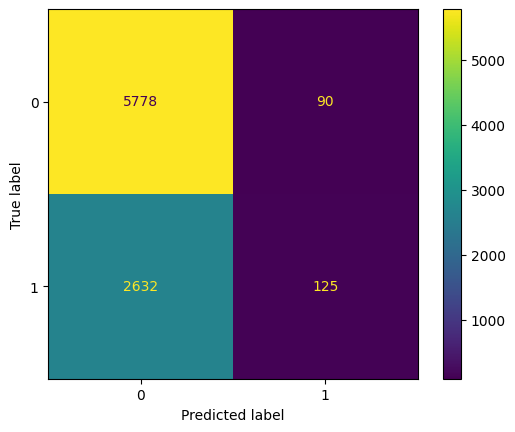

Accuracy: 0.6844057971014492
Recall decision tree: 0.04533913674283642
Precision decision tree: 0.5813953488372093
F1 score decision tree: 0.08411843876177659


In [80]:
y_train = np.ravel(y_train)
clf = SVC(kernel='linear')
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=clf.classes_)
            

disp.plot()
plt.show()
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall decision tree:", metrics.recall_score(y_test, y_pred))
print("Precision decision tree:", metrics.precision_score(y_test, y_pred))
print("F1 score decision tree:", metrics.f1_score(y_test, y_pred))


In [ ]:
y_train = np.ravel(y_train)
clf = SVC(kernel='rbf')
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall decision tree:", metrics.recall_score(y_test, y_pred))
print("Precision decision tree:", metrics.precision_score(y_test, y_pred))
print("F1 score decision tree:", metrics.f1_score(y_test, y_pred))



In [ ]:
y_train = np.ravel(y_train)
clf = SVC(kernel='poly')
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall decision tree:", metrics.recall_score(y_test, y_pred))
print("Precision decision tree:", metrics.precision_score(y_test, y_pred))
print("F1 score decision tree:", metrics.f1_score(y_test, y_pred))

In [ ]:
y_train = np.ravel(y_train)
clf = SVC(kernel='sigmoid')
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall decision tree:", metrics.recall_score(y_test, y_pred))
print("Precision decision tree:", metrics.precision_score(y_test, y_pred))
print("F1 score decision tree:", metrics.f1_score(y_test, y_pred))

In [ ]:


def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=x_train.shape[1], activation='relu',kernel_initializer='lecun_uniform'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(8, activation='relu', kernel_initializer='lecun_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create the KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=0)

# Use cross_val_score to evaluate the model using 10-fold cross-validation
# scores = cross_val_score(model, x_train, y_train, cv=10)

# Print the mean and standard deviation of the scores
#print("Mean accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))

# Train the model, keeping track of the training and validation accuracy for each epoch
history = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_data=(x_test, y_test))

# Extract the training and validation accuracy from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation recall
plt.plot(range(1, len(train_acc) + 1), train_acc, 'b', label='Training accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# make confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
predictions = model.predict(x_test)
 # print the predictions
print(predictions)

In [ ]:
# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)
print(confusion_mat)

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

# print the precision
print("Precision:",metrics.precision_score(y_test, predictions))

# print the recall
print("Recall:",metrics.recall_score(y_test, predictions))

# print the f1 score
print("F1 Score:",metrics.f1_score(y_test, predictions))